<a href="https://colab.research.google.com/github/VicariousVision/CF/blob/main/Cashflow_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.2 MB/s 


In [ ]:


# For data preprocessing
import pandas as pd
import numpy as np

# To build visualizations
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats
import pylab

# Stats model to perfrom statistical analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# To build ML models
#from fbprophet import Prophet
from matplotlib import pyplot as plt
import pandas.util.testing as tm
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv("cash_flow_data.csv")
grouped = df.groupby('subcategory')
df_collections = grouped.get_group('COLLECTIONS')

df_collections.drop_duplicates()
df_collections = df_collections.dropna()
df_collections['date'] = pd.to_datetime(df_collections['date'])
df_collections.transaction.unique()

array(['OTHER / TELKOM MOBILE', 'ABSA BANK', 'STD BANK',
       'MTN / VODACOM / CELL-C / NEOTEL', 'NEDBANK MOBILE DEBIT ORDERS',
       'FNB'], dtype=object)

In [ ]:
df.subcategory.unique()

array(['OTHER INFLOWS', 'TREASURY PAYMENTS', 'WHOLESALE PAYMENTS',
       'ACCOUNTS PAYABLE', 'COLLECTIONS', 'STAFF COSTS', 'SARS',
       'ADHOC PAYMENTS', 'BIDVEST/EXCELLERATE PAYMENTS'], dtype=object)

In [ ]:
"""
deepar = DeepAREstimator(prediction_length=12, freq="M", trainer=Trainer(epochs=5))
model = deepar.train(dataset.train)

# Make predictions
true_values = to_pandas(list(dataset.test)[0])
true_values.to_timestamp().plot(color="k")

prediction_input = PandasDataset([true_values[:-36], true_values[:-24], true_values[:-12]])
predictions = model.predict(prediction_input)

for color, prediction in zip(["green", "blue", "purple"], predictions):
    prediction.plot(color=f"tab:{color}")

plt.legend(["True values"], loc="upper left", fontsize="xx-large")
"""

In [ ]:
time_serise('Dividends')

def time_serrise(string):
  


In [ ]:
df = pd.read_csv("cash_flow_data.csv", index_col=0, parse_dates=True)

df.head(5000)

,actual,budgeted,date,subcategory
transaction,,,,
LOCAL INTEREST ON CALL,8.046857,8.046857,2018-04-03,OTHER INFLOWS
DIVIDENDS,58.410000,58.410000,2018-04-03,OTHER INFLOWS
EXCH. RATE DIFF,-3.007060,-3.007060,2018-04-03,TREASURY PAYMENTS
INTEREST LOCAL,-6.191096,-6.191096,2018-04-03,TREASURY PAYMENTS
INTEREST FOREIGN,-0.072649,-0.072649,2018-04-03,TREASURY PAYMENTS
...,...,...,...,...
INTEREST LOANS,-1.808219,-1.808219,2021-10-01,TREASURY PAYMENTS
OTHER,-0.019039,NaN,2021-10-01,STAFF COSTS
SUNDRY PAYMENTS,-0.192779,-0.214111,2021-10-01,ACCOUNTS PAYABLE


In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df2 = pd.read_csv("cash_flow_data.csv", header=0)
df2=df2.set_index('date')

In [ ]:
df = pd.read_csv("cash_flow_data.csv", header=0,infer_datetime_format=True,parse_dates={'dt' : ['date']})
df2=df2.interpolate()
df2

,transaction,actual,budgeted,subcategory
date,,,,
2018-04-03,LOCAL INTEREST ON CALL,8.046857,8.046857,OTHER INFLOWS
2018-04-03,DIVIDENDS,58.410000,58.410000,OTHER INFLOWS
2018-04-03,EXCH. RATE DIFF,-3.007060,-3.007060,TREASURY PAYMENTS
2018-04-03,INTEREST LOCAL,-6.191096,-6.191096,TREASURY PAYMENTS
2018-04-03,INTEREST FOREIGN,-0.072649,-0.072649,TREASURY PAYMENTS
...,...,...,...,...
2022-08-30,OTHER / TELKOM MOBILE,298.284892,-0.400000,COLLECTIONS
2022-08-30,SUNDRY PAYMENTS,-0.171476,-0.171476,ACCOUNTS PAYABLE
2022-08-30,STD BANK,0.373367,59.914262,COLLECTIONS


In [ ]:
#df=df.interpolate()
grouped = df.groupby('subcategory')
df_collections = grouped.get_group('COLLECTIONS')

df_collections.drop_duplicates()
#df_collections['date'] = pd.to_datetime(df_collections['date'])


,dt,transaction,actual,budgeted,subcategory
7,2018-04-03,OTHER / TELKOM MOBILE,190.946232,0.0,COLLECTIONS
8,2018-04-03,ABSA BANK,185.578039,155.0,COLLECTIONS
9,2018-04-03,STD BANK,3.833416,0.0,COLLECTIONS
12,2018-04-05,STD BANK,0.741199,0.0,COLLECTIONS
13,2018-04-05,ABSA BANK,135.515619,75.0,COLLECTIONS
...,...,...,...,...,...
6290,2022-08-26,OTHER / TELKOM MOBILE,5.473883,NaN,COLLECTIONS
6291,2022-08-26,MTN / VODACOM / CELL-C / NEOTEL,23.983009,NaN,COLLECTIONS
6294,2022-08-30,OTHER / TELKOM MOBILE,298.284892,NaN,COLLECTIONS
6296,2022-08-30,STD BANK,0.373367,NaN,COLLECTIONS


In [ ]:
df_absa = df_collections.groupby('transaction')
ABSA_Y_df = df_absa.get_group('ABSA BANK')
ABSA_Y_df=ABSA_Y_df.drop(['transaction','subcategory','budgeted'],axis=1)

In [ ]:
Y_train_ABSA = ABSA_Y_df.loc[665:]

In [ ]:
ABSA_Y_df

,dt,actual
8,2018-04-03,185.578039
13,2018-04-05,135.515619
18,2018-04-09,71.290547
24,2018-04-11,103.695190
37,2018-04-13,131.432014
...,...,...
6274,2022-08-18,50.962787
6278,2022-08-22,79.557099
6284,2022-08-24,42.134565
6289,2022-08-26,100.276624


In [ ]:
ABSA_Y_df.rename(columns = {'actual':'y','dt':'ds'},inplace = True)
ABSA_Y_df

,ds,y
8,2018-04-03,185.578039
13,2018-04-05,135.515619
18,2018-04-09,71.290547
24,2018-04-11,103.695190
37,2018-04-13,131.432014
...,...,...
6274,2022-08-18,50.962787
6278,2022-08-22,79.557099
6284,2022-08-24,42.134565
6289,2022-08-26,100.276624


In [ ]:
!pip uninstall statsmodels && pip install statsmodels --upgrade
!pip install statsforecast
! pip uninstall pandas
!pip install --upgrade pandas

In [ ]:
import matplotlib.pyplot as plt
from statsforecast import StatsForecast
from statsforecast.models import __all__

In [ ]:
ABSA_Y_df.tail(30)

,ds,y
6076,2022-06-09,29.291343
6080,2022-06-13,32.724263
6093,2022-06-15,94.157386
6097,2022-06-20,85.596197
6105,2022-06-22,69.295311
6108,2022-06-24,73.274874
6120,2022-06-28,71.305046
6139,2022-06-30,869.528290
6146,2022-07-01,169.712944
6154,2022-07-05,107.176493


In [ ]:
#train test split
df_train = ABSA_Y_df[ABSA_Y_df.ds<'2022-01-01']
df_test = ABSA_Y_df[ABSA_Y_df.ds>'2021-12-31']
df_test

,ds,y
5486,2022-01-03,105.929287
5490,2022-01-03,105.929287
5497,2022-01-05,38.894427
5498,2022-01-05,38.894427
5503,2022-01-07,64.723376
...,...,...
6274,2022-08-18,50.962787
6278,2022-08-22,79.557099
6284,2022-08-24,42.134565
6289,2022-08-26,100.276624


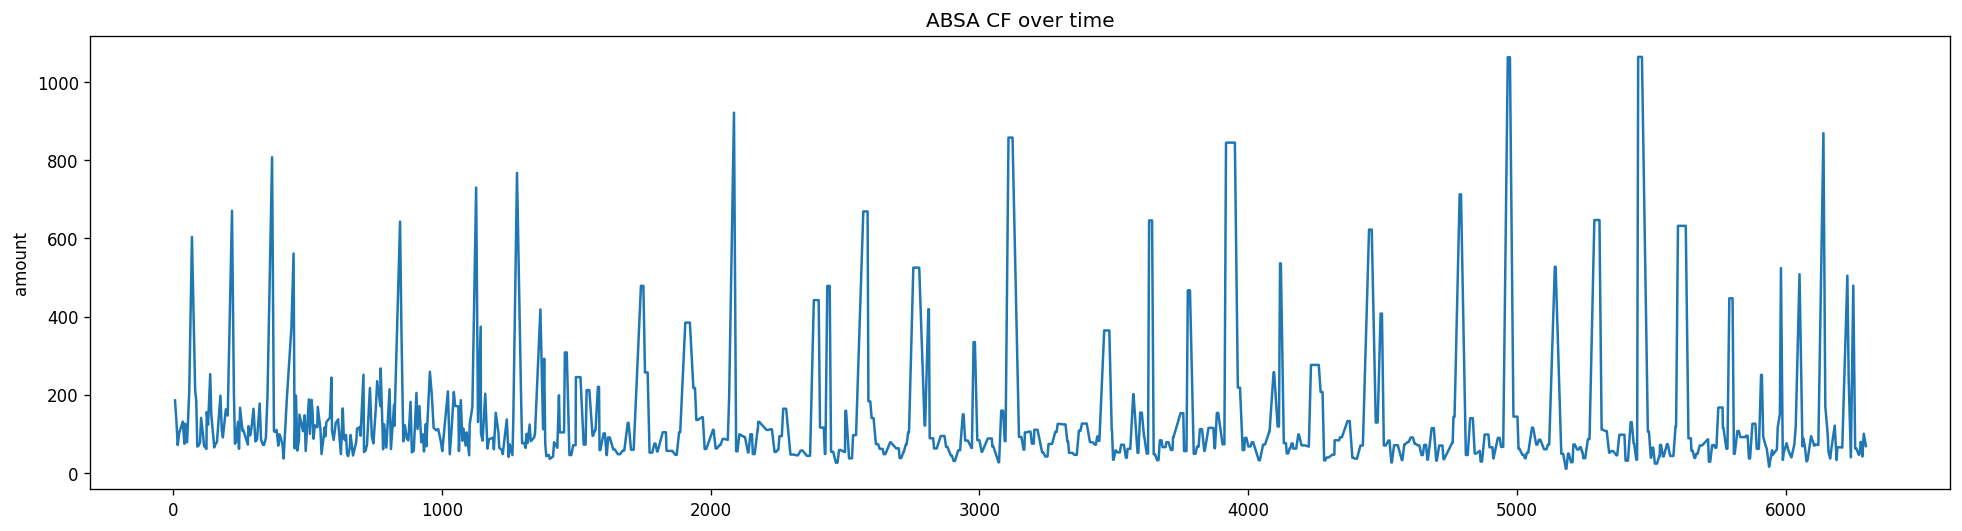

In [ ]:
# Using the pandas library

plt.rcParams['figure.figsize'] = (20, 5)
plt.title('ABSA CF over time')
plt.ylabel('amount')
ABSA_Y_df.y.plot() ;

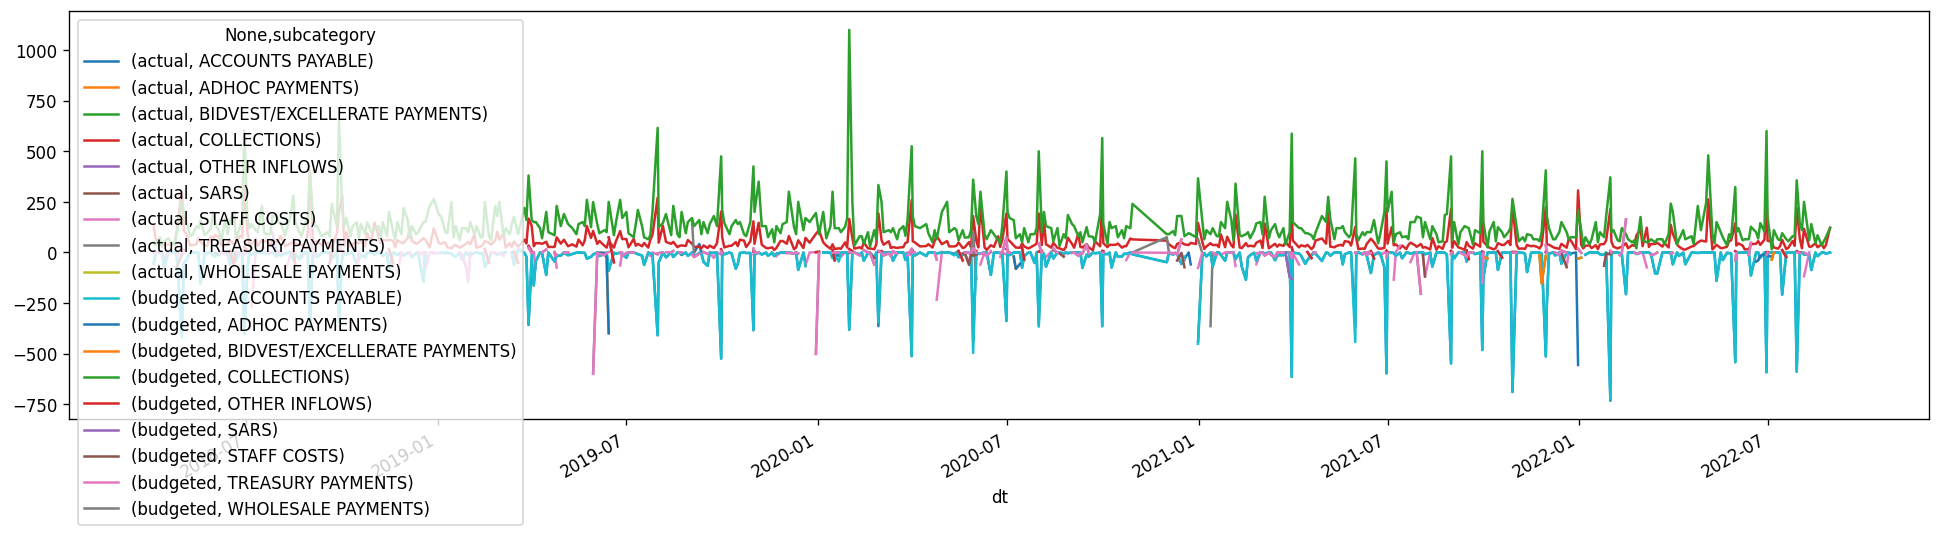

In [ ]:
pd.pivot_table(df,index = 'dt',
               columns = 'subcategory').plot()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.7/dist-packages/statsforecast/arima.py:1020: RuntimeWarning: invalid value encountered in sqrt
  return any(np.isnan(np.sqrt(np.diag(obj['var_coef']))))
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr

KeyError: ignored

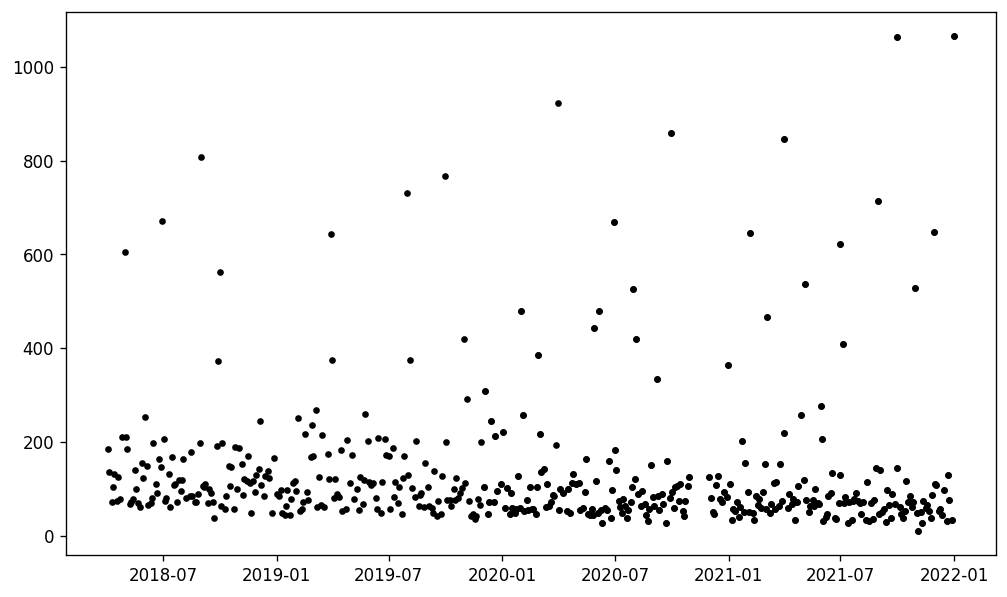

In [ ]:
from statsforecast.adapters.prophet import AutoARIMAProphet
model = AutoARIMAProphet()
model = model.fit(df_train)
horizon = 1
future = model.make_future_dataframe(horizon)
forecast = model.predict(future)


fig = model.plot(future)



In [ ]:
df_test.ds.max()

Timestamp('2022-08-30 00:00:00')

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.7/dist-packages/statsforecast/arima.py:1020: RuntimeWarning: invalid value encountered in sqrt
  return any(np.isnan(np.sqrt(np.diag(obj['var_coef']))))
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value enc

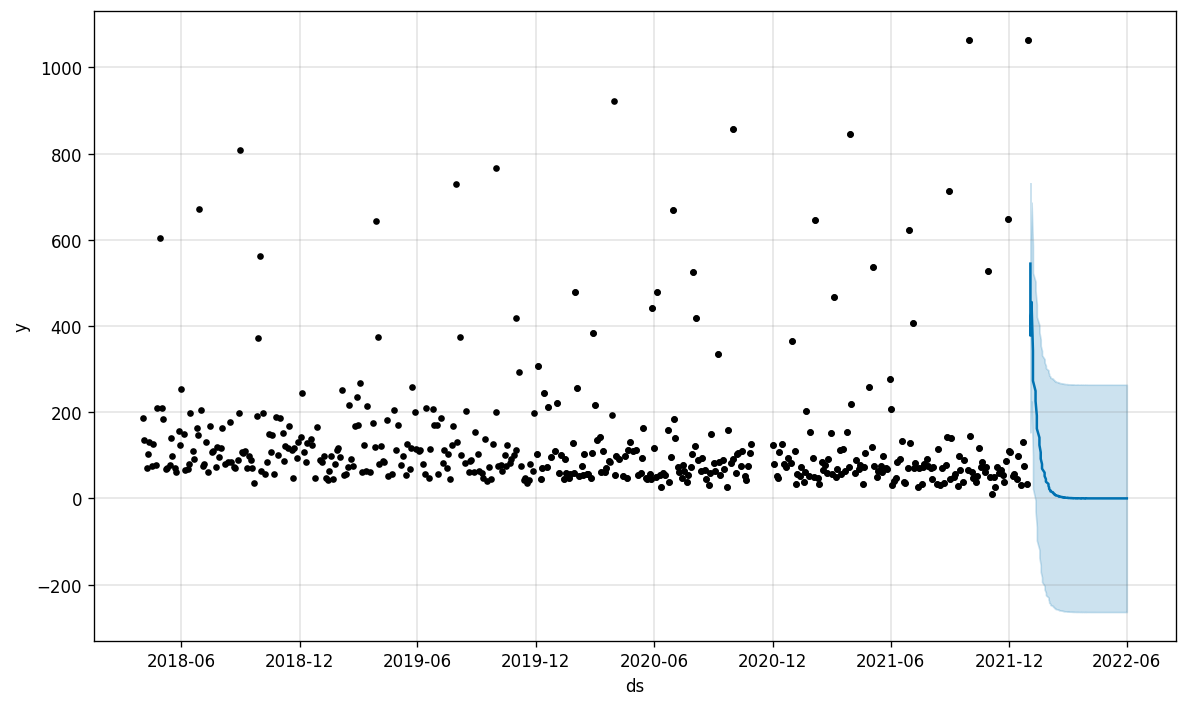

In [ ]:
from statsforecast.adapters.prophet import AutoARIMAProphet
model = AutoARIMAProphet(daily_seasonality=True)
model = model.fit(df_train)
horizon = 7
future = model.make_future_dataframe(horizon)
forecast = model.predict(df_test)

#df_test['forecast','1','2','3'] = forecast

fig = model.plot(forecast)

In [ ]:
forecast

,ds,yhat,yhat_lower,yhat_upper
0,2021-01-04,213.598847,42.804923,384.392771
1,2021-01-04,162.339905,-29.539308,354.219118
2,2021-01-06,158.190154,-38.788022,355.168330
3,2021-01-06,181.086288,-19.791278,381.963853
4,2021-01-08,176.116954,-29.078605,381.312514
...,...,...,...,...
209,2021-10-25,0.000007,-240.019370,240.019384
210,2021-10-27,0.000006,-240.019370,240.019383
211,2021-10-27,0.000006,-240.019371,240.019383
212,2021-10-29,0.000005,-240.019371,240.019382


In [ ]:
rms = mean_squared_error(df_train.y, forecast.yhat, squared=False)

ValueError: ignored

In [ ]:
model = auto_arima(df_train.ds, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.VWAP, exogenous=df_train[exogenous_features])

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast

In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, ETS

In [ ]:
season_length = 12
horizon = len(Y_test_df)
models = [
AutoARIMA(season_length=season_length),
ETS(season_length=season_length, model='ZMZ')
]
model = StatsForecast(df=Y_train_df,models=models,freq='M')

In [ ]:
!pip install pyaf

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 39 kB/s 
     |████████████████████████████████| 199 kB 31.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845513 sha256=1cea56ad96985cc11878fe070e5c305bffd71301a1032227ffaf87e5d587186e
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Time series data analysis with Spark") \
    .getOrCreate()

In [ ]:
df_1 = spark.read.csv("cash_flow_data.csv", inferSchema="true", header="true")

In [ ]:
df_1.groupBy("date").count().show()

+-------------------+-----+
|               date|count|
+-------------------+-----+
|2020-03-31 00:00:00|   18|
|2020-07-13 00:00:00|   14|
|2021-08-27 00:00:00|   12|
|2022-01-03 00:00:00|   12|
|2022-04-07 00:00:00|    7|
|2018-12-13 00:00:00|    7|
|2019-10-10 00:00:00|    4|
|2020-05-13 00:00:00|   16|
|2021-12-13 00:00:00|   12|
|2018-12-24 00:00:00|    3|
|2019-09-11 00:00:00|    5|
|2019-12-02 00:00:00|   18|
|2018-11-21 00:00:00|    5|
|2019-07-16 00:00:00|    6|
|2020-06-11 00:00:00|   12|
|2022-02-25 00:00:00|   20|
|2022-08-18 00:00:00|    4|
|2019-04-25 00:00:00|   10|
|2020-08-24 00:00:00|   16|
|2021-05-07 00:00:00|   18|
+-------------------+-----+
only showing top 20 rows



In [ ]:
df_1.show()

+--------------------+------------------+------------------+-------------------+------------------+
|         transaction|            actual|          budgeted|               date|       subcategory|
+--------------------+------------------+------------------+-------------------+------------------+
|LOCAL INTEREST ON...|        8.04685685|        8.04685685|2018-04-03 00:00:00|     OTHER INFLOWS|
|           DIVIDENDS|             58.41|             58.41|2018-04-03 00:00:00|     OTHER INFLOWS|
|     EXCH. RATE DIFF|       -3.00705988|       -3.00705988|2018-04-03 00:00:00| TREASURY PAYMENTS|
|      INTEREST LOCAL|-6.191095880000001|-6.191095880000001|2018-04-03 00:00:00| TREASURY PAYMENTS|
|    INTEREST FOREIGN|       -0.07264854|       -0.07264854|2018-04-03 00:00:00| TREASURY PAYMENTS|
|WHOLESALE FOREX P...|         -2.304918|         -2.304918|2018-04-03 00:00:00|WHOLESALE PAYMENTS|
|            LOCAL AP|       -0.18180559|              -0.1|2018-04-03 00:00:00|  ACCOUNTS PAYABLE|


In [ ]:
df_1.groupBy('transaction').agg({"actual": "avg", "budgeted": "avg"} ).show()

+--------------------+--------------------+-------------------+
|         transaction|         avg(actual)|      avg(budgeted)|
+--------------------+--------------------+-------------------+
|         AP PAYMENTS|  -83.95565741194137| -84.55315269286496|
|OTHER / TELKOM MO...|  43.273963921592134|  170.0068257131034|
|NEDBANK MOBILE DE...|   89.59295402843601|  147.5337247706422|
|                 VAT|  -90.13954368285715| -92.78611103170734|
|              OTHER |  0.9517870323116885| -9.075999999999999|
|           DIVIDENDS|     -146.2983577175|-200.07179204444444|
|   MONEY MARKET SWAP|  -2.201671256944445| -2.201671256944445|
|            SALARIES| -180.31178478408168|-184.36018250187502|
| INTEREST ON CARRIES|           0.6810948|          0.6810948|
|TRUDON COLLECTION...|  -38.04741475560976| -38.40356404926829|
|BIDVEST/BROLL/ EX...|  -48.83508903491976| -48.76043766294116|
|            CASHIERS|-0.16323909055555555|-0.6643698866666665|
|          MEDSCHEMES|        -25.688331

In [ ]:
PandasDF = df_1.toPandas()

In [ ]:
#Should plot a bar plot but doesnt for some reason
import numpy as np
from plotly.graph_objs import *
uni_Index=np.unique(PandasDF.transaction, return_counts=True)
data = [Bar(x=uni_Index[0], y=uni_Index[1])]
layout = Layout(title="Equity Indexes: DJ Transport",yaxis=dict(title='Counts'))
fig = Figure(data=data, layout=layout)
iplot(fig)



In [ ]:
import pandas as pd
from prophet import Prophet

In [ ]:
df = pd.read_csv('cash_flow_data.csv')
df.head()

,transaction,actual,budgeted,date,subcategory
0,LOCAL INTEREST ON CALL,8.046857,8.046857,2018-04-03,OTHER INFLOWS
1,DIVIDENDS,58.410000,58.410000,2018-04-03,OTHER INFLOWS
2,EXCH. RATE DIFF,-3.007060,-3.007060,2018-04-03,TREASURY PAYMENTS
3,INTEREST LOCAL,-6.191096,-6.191096,2018-04-03,TREASURY PAYMENTS
4,INTEREST FOREIGN,-0.072649,-0.072649,2018-04-03,TREASURY PAYMENTS


In [ ]:
m = Prophet()
m=m.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfwcdc9e/im9ciz7p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfwcdc9e/shys67l3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89904', 'data', 'file=/tmp/tmpdfwcdc9e/im9ciz7p.json', 'init=/tmp/tmpdfwcdc9e/shys67l3.json', 'output', 'file=/tmp/tmpdfwcdc9e/prophet_modely5cjd6vv/prophet_model-20221027114932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:49:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:49:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=117)
future.tail()

,ds
574,2022-04-23
575,2022-04-24
576,2022-04-25
577,2022-04-26
578,2022-04-27


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
574,2022-04-23,141.899360,-45.051342,325.752455
575,2022-04-24,142.229786,-72.720196,320.156058
576,2022-04-25,95.239438,-97.142519,295.698750
577,2022-04-26,99.963596,-90.642097,299.115722
578,2022-04-27,109.576707,-83.282919,312.403027


In [ ]:
forecast.shape

(579, 19)

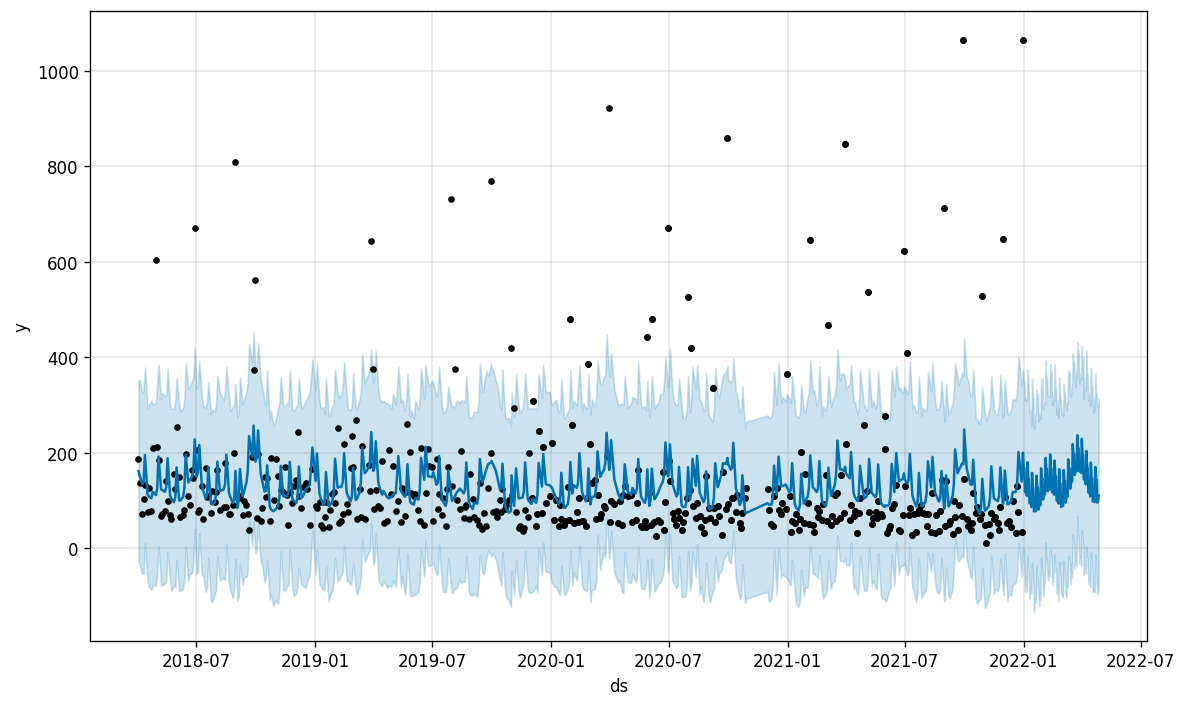

In [ ]:
fig1 = m.plot(forecast)

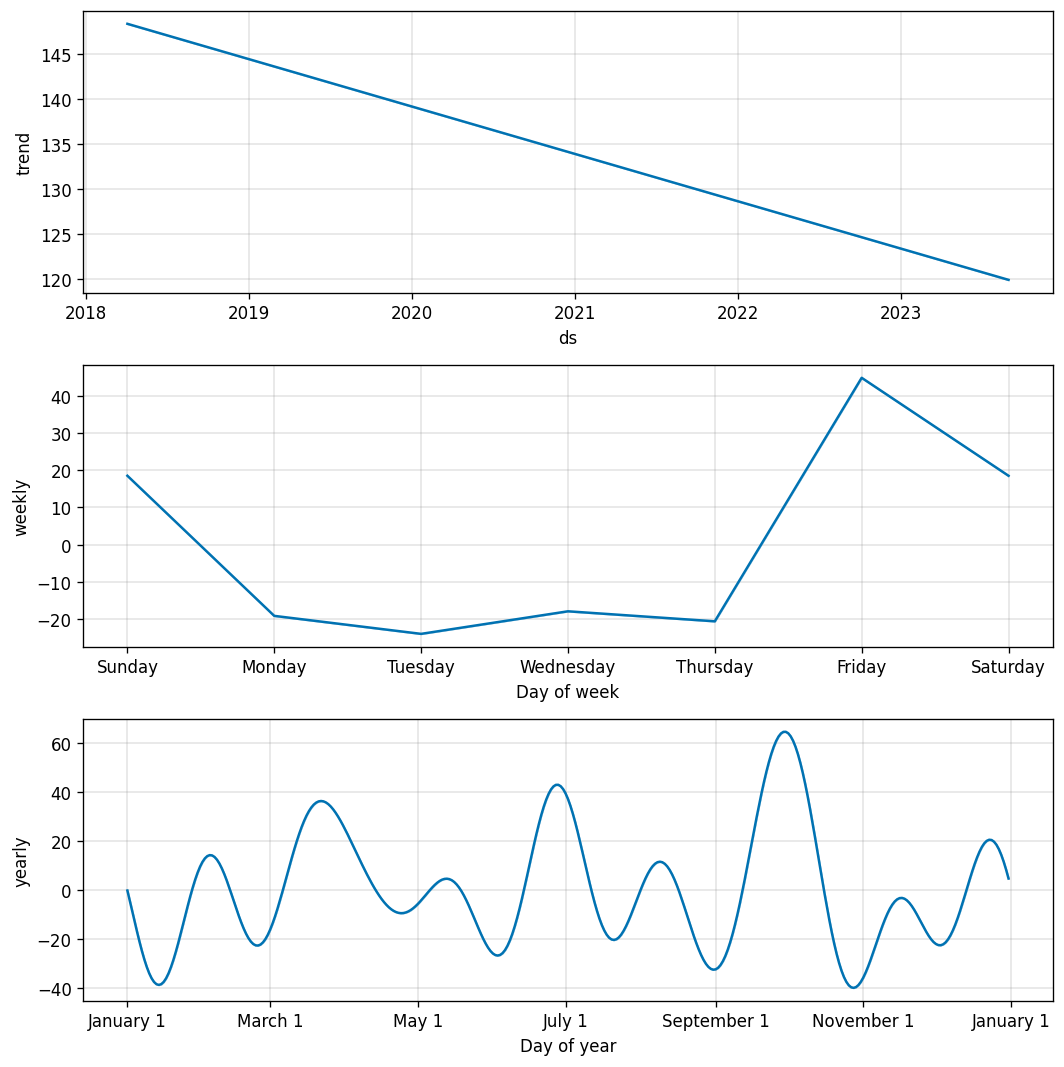

In [ ]:
fig2 = m.plot_components(forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfwcdc9e/i697quvk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfwcdc9e/kl7tazkk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38734', 'data', 'file=/tmp/tmpdfwcdc9e/i697quvk.json', 'init=/tmp/tmpdfwcdc9e/kl7tazkk.json', 'output', 'file=/tmp/tmpdfwcdc9e/prophet_modelabvxe37f/prophet_model-20221027132423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:24:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds        yhat  yhat_lower  yhat_upper
0 2022-01-03  117.250931  -72.435040  293.690923
1 2022-01-03  117.250931  -67.104711  315.089504
2 2022-01-05  123.655453  -64.800868  318.586244
3 2022-01-05  123.655453  -67.815642  311.123421
4 2022-01-07  179.750502  -14.927312  375.971938


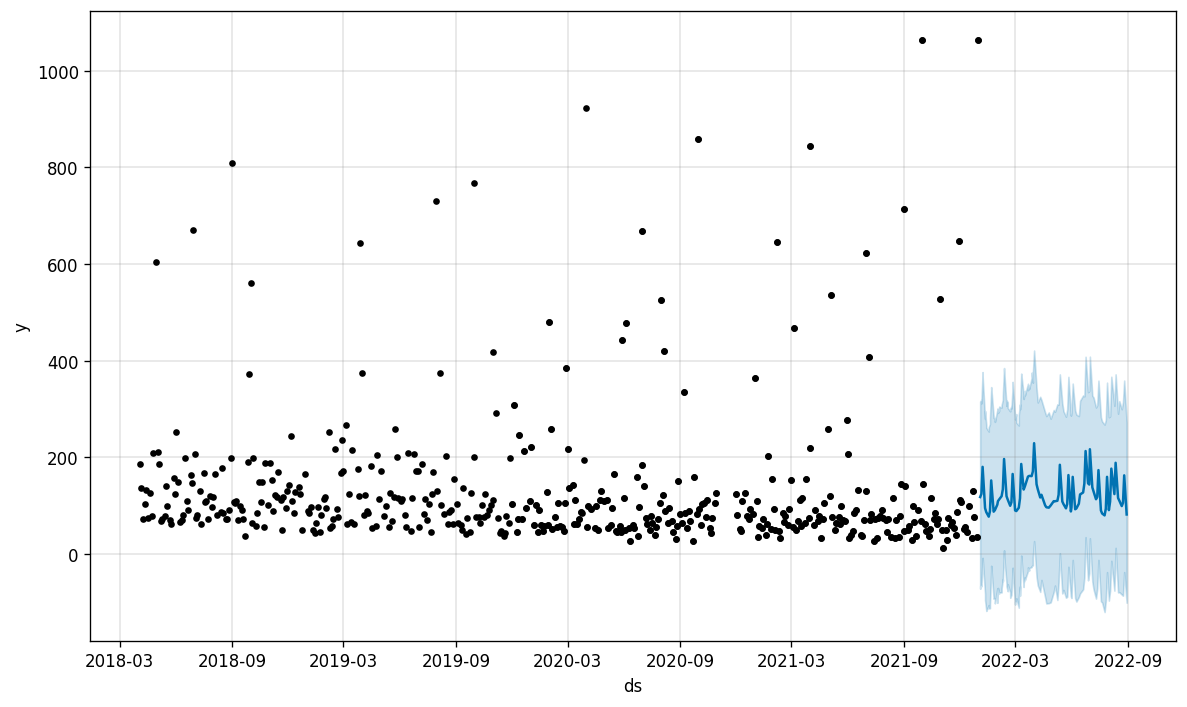

In [ ]:
# make an in-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
#from fbprophet import Prophet
from matplotlib import pyplot
#Ensambhdjkfvbdslf methods 


# define the model
model = Prophet()
# fit the model
model.fit(df_train)
# define the period for which we want a prediction

predict_dates = pd.DataFrame()
predict_dates['ds'] = df_test.ds.values


predictions = model.predict(predict_dates)
# summarize the forecast
print(predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(predictions)
pyplot.show()


In [ ]:
future

,ds
0,2022-01-03
1,2022-01-03
2,2022-01-05
3,2022-01-05
4,2022-01-07
...,...
112,2022-08-18
113,2022-08-22
114,2022-08-24
115,2022-08-26


In [ ]:
forecast.yhat

0      117.250931
1      117.250931
2      123.655453
3      123.655453
4      179.750502
          ...    
112    109.912432
113     98.515866
114    105.109211
115    162.168611
116     81.143168
Name: yhat, Length: 117, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(df_test.y, forecast.yhat))

142.83228324543575

In [ ]:
predictions.index = df_test.ds
valid = df_test
valid.index = df_test.ds


In [ ]:
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,
2022-01-03,2022-01-03,134.658468,-72.435040,293.690923,134.658468,134.658468,-17.407536,-17.407536,-17.407536,-26.946632,-26.946632,-26.946632,9.539095,9.539095,9.539095,0.0,0.0,0.0,117.250931
2022-01-03,2022-01-03,134.658468,-67.104711,315.089504,134.658468,134.658468,-17.407536,-17.407536,-17.407536,-26.946632,-26.946632,-26.946632,9.539095,9.539095,9.539095,0.0,0.0,0.0,117.250931
2022-01-05,2022-01-05,134.644699,-64.800868,318.586244,134.644699,134.644699,-10.989245,-10.989245,-10.989245,-14.417788,-14.417788,-14.417788,3.428543,3.428543,3.428543,0.0,0.0,0.0,123.655453
2022-01-05,2022-01-05,134.644699,-67.815642,311.123421,134.644699,134.644699,-10.989245,-10.989245,-10.989245,-14.417788,-14.417788,-14.417788,3.428543,3.428543,3.428543,0.0,0.0,0.0,123.655453
2022-01-07,2022-01-07,134.630930,-14.927312,375.971938,134.630930,134.630930,45.119572,45.119572,45.119572,48.543694,48.543694,48.543694,-3.424123,-3.424123,-3.424123,0.0,0.0,0.0,179.750502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-18,2022-08-18,133.095704,-79.864204,315.901409,133.095661,133.095742,-23.183271,-23.183271,-23.183271,-25.409015,-25.409015,-25.409015,2.225744,2.225744,2.225744,0.0,0.0,0.0,109.912432
2022-08-22,2022-08-22,133.068166,-84.757937,299.148836,133.068123,133.068205,-34.552300,-34.552300,-34.552300,-26.946632,-26.946632,-26.946632,-7.605668,-7.605668,-7.605668,0.0,0.0,0.0,98.515866
2022-08-24,2022-08-24,133.054397,-87.130521,313.725148,133.054353,133.054437,-27.945186,-27.945186,-27.945186,-14.417788,-14.417788,-14.417788,-13.527398,-13.527398,-13.527398,0.0,0.0,0.0,105.109211


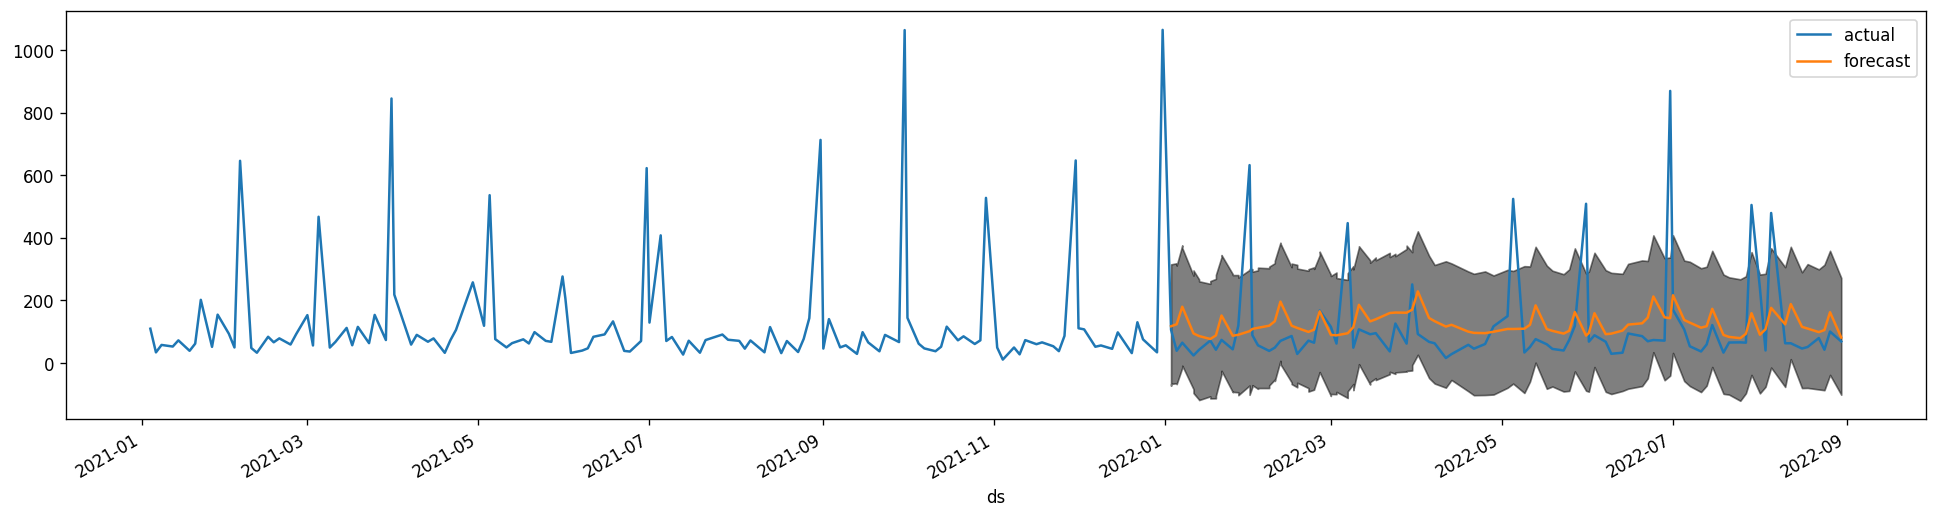

In [ ]:
ax=ABSA_Y_df[ABSA_Y_df.index>'2020-12-31']['y'].plot(label = 'actual')
predictions.yhat.plot(ax=ax,label = 'forecast')
ax.fill_between(predictions.index,predictions.yhat_lower,predictions.yhat_upper,color='k',alpha=0.5)
plt.legend()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfwcdc9e/w1q36oy8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfwcdc9e/2fqrj8dn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61648', 'data', 'file=/tmp/tmpdfwcdc9e/w1q36oy8.json', 'init=/tmp/tmpdfwcdc9e/2fqrj8dn.json', 'output', 'file=/tmp/tmpdfwcdc9e/prophet_modelbxs3ite6/prophet_model-20221027133016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:30:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:30:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds        yhat  yhat_lower  yhat_upper
0 2022-09-01   71.761322 -112.879636  253.334841
1 2022-09-02  137.994540  -63.154972  328.990220
2 2022-09-03  112.518163  -72.263284  312.784111
3 2022-09-04  113.986498  -82.158592  287.475462
4 2022-09-05   78.111022 -121.580891  262.541441


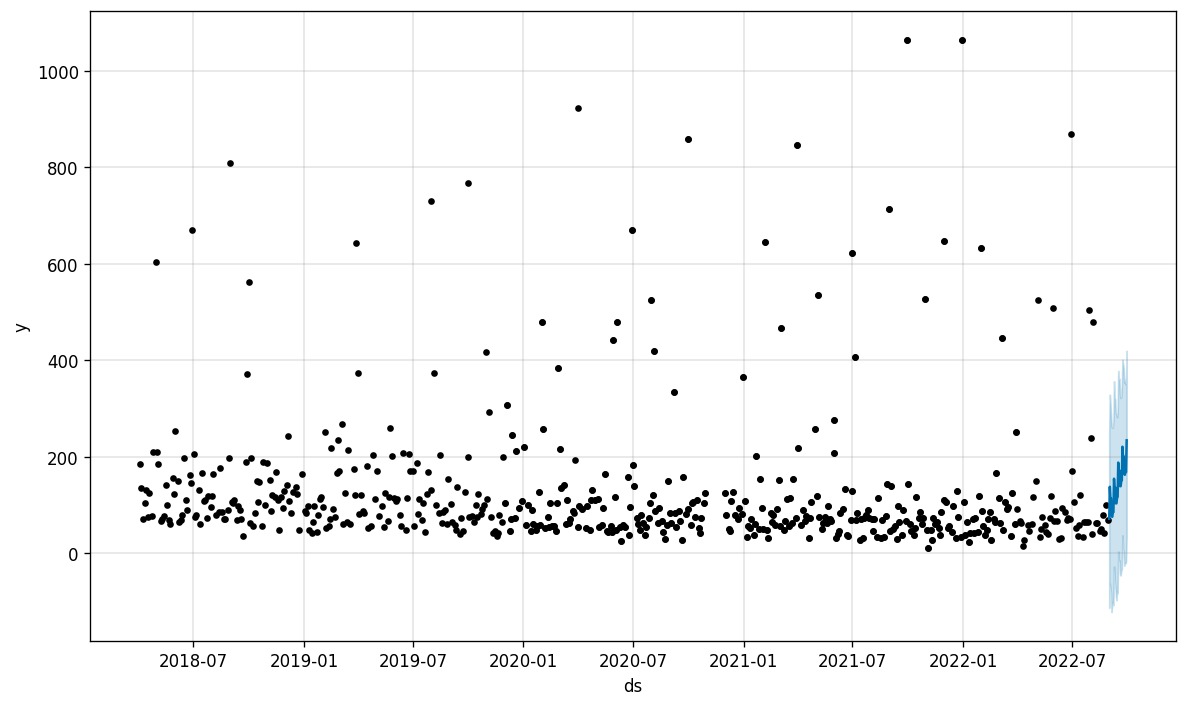

In [ ]:
# define the model
model = Prophet()
# fit the model
model.fit(ABSA_Y_df)
# define the period for which we want a prediction

future = pd.DataFrame()
#future['ds'] = ['2022-09-01'.... '2022-09-30','2022-10-03'...,'2022-11-31']
future['ds'] = pd.date_range(start='2022-09-01',end='2022-09-30')

forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()
#has context menu

In [ ]:
september = forecast[['yhat_upper','yhat_lower','yhat']].iloc[:11]
september.index = ['2022-09-01','2022-09-05','2022-09-11','2022-09-14','2022-09-15','2022-09-16','2022-09-19','2022-09-20','2022-09-23','2022-09-25','2022-09-30']
september.index = pd.to_datetime(september.index)

In [ ]:
october = forecast[['yhat_upper','yhat_lower','yhat']].iloc[11:22]
october.index = ['2022-10-01','2022-10-05','2022-10-11','2022-10-14','2022-10-15','2022-10-16','2022-10-19','2022-10-20','2022-10-23','2022-10-25','2022-10-31']
october.index = pd.to_datetime(october.index)

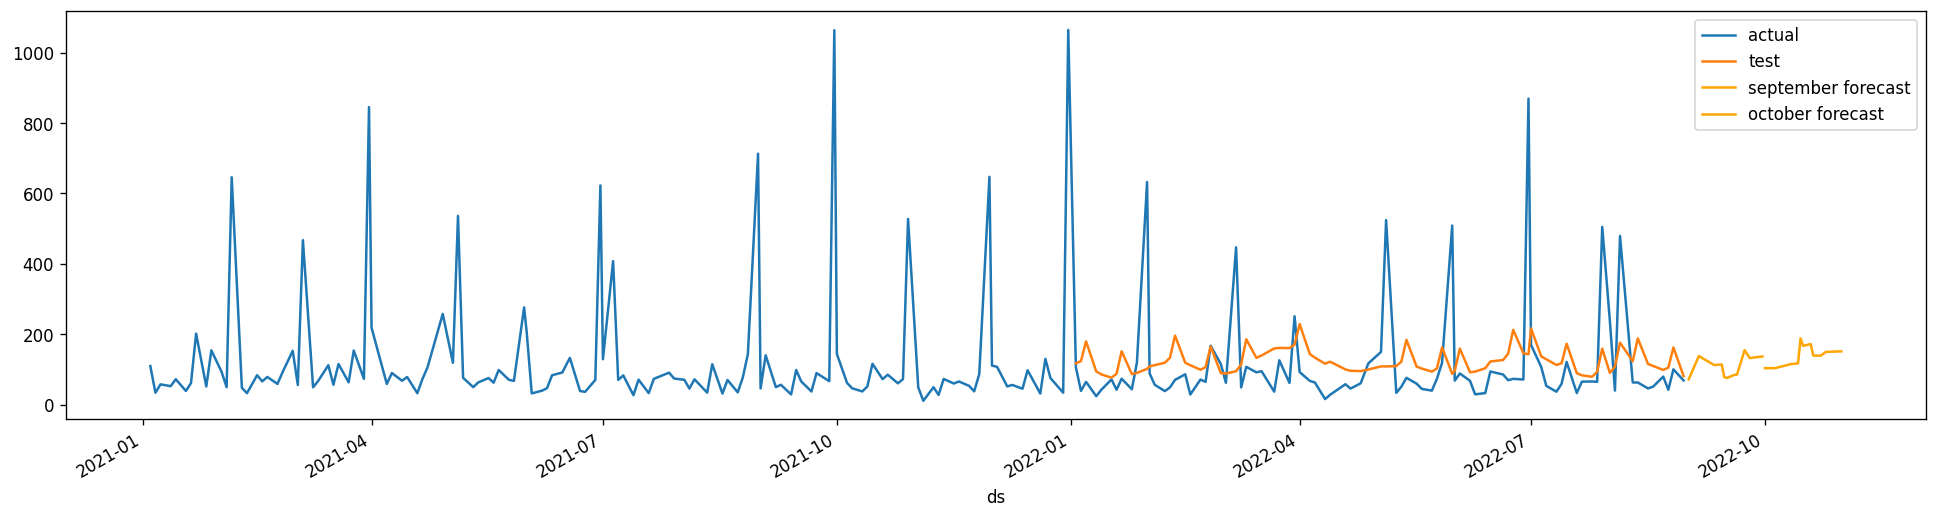

In [ ]:

ax=ABSA_Y_df[ABSA_Y_df.index>'2020-12-31']['y'].plot(label = 'actual')
predictions.yhat.plot(ax=ax,label = 'test')
september.yhat.plot(ax=ax,label = 'september forecast',color = 'orange')
october.yhat.plot(ax=ax,label = 'october forecast',color = 'orange')
plt.legend()

In [ ]:
valid.index = pd.to_datetime(valid.index)

In [ ]:
ABSA_Y_df.index = pd.to_datetime(ABSA_Y_df.ds)

In [ ]:
#Show how far we are from prediction correct values
#

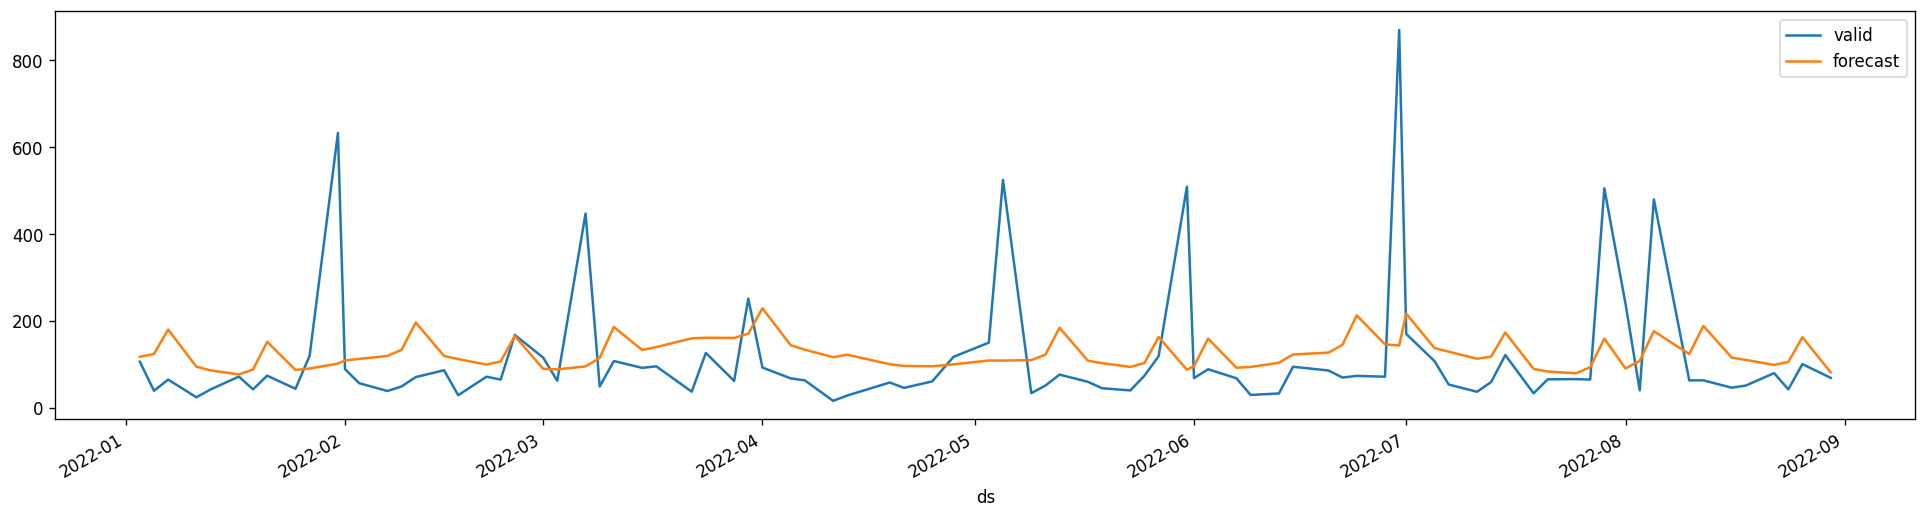

In [ ]:
valid.y.plot(label = 'valid')
predictions.yhat.plot(label = 'forecast')
plt.legend()

In [ ]:
  ax = train.plot(label='Observed')

  test[:].plot(ax=ax, label='Test')

  pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))

  ax.fill_between(pred_ci.index,

                lower_i,

                upper_i, 

                color='k', 

                alpha=.2)

  

  ax.set_xlabel('Month')

  ax.set_ylabel('Issues')

  plt.legend()

  return results